# DATA CLEANING

<div style="text-align:center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfu8wHTQKsQHAW8zraLe5yOK_CDP73Iut9_Q&s" alt="A Comment Jpeg" width="500" height="200">
</div>

Data cleaning is a crucial step in the data preprocessing stage to ensure high-quality analysis. In this process, we will:

### Data Cleaning Summary

In this project, I performed data cleaning on the production dataset to prepare it for analysis and modeling. The following steps were taken:

1. **Handling Missing Values**:
   - Identified and addressed any missing values in the dataset to ensure data integrity.

2. **Handling Zero Entries**:
   - Reviewed and managed zero entries in critical columns (e.g., production volumes) to prevent skewed analysis and calculations.

3. **Calculating Gas-Oil Ratio (GOR)**:
- Added a new column for Calculated GOR using the formula: 
     - **GOR = BORE_GAS_VOL / BORE_OIL_VOL**
   - This allows for better insights into the relationship between gas and oil production. and oil production.

4. **Renaming Columns**:
   - Ensured that column names are clear and consistent for easier reference during analysis.

5. **Data Type Conversion**:
   - Converted relevant columns to appropriate data types for better performance and accuracy in analysis.

6. **Removing Duplicates**:
   - Checked for and removed any duplicate records to maintain a clean dataset.

7. **Saving the Cleaned Dataset**:
   - The cleaned dataset was saved as a CSV file for further analysis:
     - Filename: `cleaned_production_data.csv`
aned_production_data.csv`


> ### **Tools and Techniques**
> - **Pandas** for data manipulation
> - **Matplotlib** and **Seaborn** for visualizing outliers
> - **Numpy** for numerical operations

---

After data cleaning, our dataset will be more consistent, accurate, and ready for analysis, leading to more reliable insights.

In [272]:
### Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:

file_path = '../pvt_Data/volve_welldata.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0           4/7/2014    15/9-F-1 C            0.0                  0.000   
1           4/8/2014    15/9-F-1 C            0.0                    NaN   
2           4/9/2014    15/9-F-1 C            0.0                    NaN   
3          4/10/2014    15/9-F-1 C            0.0                    NaN   
4          4/11/2014    15/9-F-1 C            0.0                310.376   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                     0.000          0.000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                    96.876        277.278                0.0   

   AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0           0.00000             %      0.000       0.00          0.000   
1           1.00306             %      0.000       0.00          0.000   
2           0.97901             %      0.000       0.00          0.000   
3           0.54576             %      0.000       0.00          0.000   
4           1.21599             %     33.098      10.48         33.072   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0           0.0           0.0           0.0          NaN  production        WI  
1           0.0           0.0           0.0          NaN  production        OP  
2           0.0           0.0           0.0          NaN  production        OP  
3           0.0           0.0           0.0          NaN  production        OP  
4           0.0           0.0           0.0          NaN  production        OP

In [144]:
print(df.isna().sum())

Date of Production             0
Wellbore name                  0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64


### Data Cleaning for Production Flow Type

Selecting entries with the flow kind marked as "production" is essential for the Gas-Oil Ratio Prediction project using Ant Colony Optimization. This choice is important because production data shows the actual amount of oil and gas being produced from the wells, which is crucial for accurately predicting gas-oil ratios. In contrast, injection data relates to fluids added to the reservoir, which doesn’t help in understanding production performance. Focusing on production flow ensures the model uses the most relevant information for analyzing reservoir performance and improving recovery method.




In [148]:
# Filter the dataset for entries where the flow kind is "production"
production_data = df[df['FLOW_KIND'] == 'production']

In [149]:
production_data.head()

Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0           4/7/2014    15/9-F-1 C            0.0                  0.000   
1           4/8/2014    15/9-F-1 C            0.0                    NaN   
2           4/9/2014    15/9-F-1 C            0.0                    NaN   
3          4/10/2014    15/9-F-1 C            0.0                    NaN   
4          4/11/2014    15/9-F-1 C            0.0                310.376   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                     0.000          0.000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                    96.876        277.278                0.0   

   AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0           0.00000             %      0.000       0.00          0.000   
1           1.00306             %      0.000       0.00          0.000   
2           0.97901             %      0.000       0.00          0.000   
3           0.54576             %      0.000       0.00          0.000   
4           1.21599             %     33.098      10.48         33.072   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0           0.0           0.0           0.0          NaN  production        WI  
1           0.0           0.0           0.0          NaN  production        OP  
2           0.0           0.0           0.0          NaN  production        OP  
3           0.0           0.0           0.0          NaN  production        OP  
4           0.0           0.0           0.0          NaN  production        OP

In [152]:
production_data.shape

(9161, 18)

The dataset contains a total of 9,161 entries

In [155]:
production_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9161 entries, 0 to 15632
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date of Production        9161 non-null   object 
 1   Wellbore name             9161 non-null   object 
 2   ON_STREAM_HRS             9161 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 5   AVG_DP_TUBING             8980 non-null   float64
 6   AVG_ANNULUS_PRESS         7890 non-null   float64
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64
 8   AVG_CHOKE_UOM             9161 non-null   object 
 9   AVG_WHP_P                 9155 non-null   float64
 10  AVG_WHT_P                 9146 non-null   float64
 11  DP_CHOKE_SIZE             9155 non-null   float64
 12  BORE_OIL_VOL              9161 non-null   float64
 13  BORE_GAS_VOL              9161 non-null   float64
 14  BORE_WAT_VOL

#### Display unique values for each column in the production dataset

In [158]:
# Looping through each column in the production dataset to display unique values
for column in production_data.columns:
    unique_values = production_data[column].unique()  
    print(f"{column}: {unique_values}") 

Date of Production: ['4/7/2014' '4/8/2014' '4/9/2014' ... '5-Jul-13' '6-Jul-13' '7-Jul-13']
Wellbore name: ['15/9-F-1 C' '15/9-F-11 H' '15/9-F-12 H' '15/9-F-14 H' '15/9-F-15 D'
 '15/9-F-5 AH']
ON_STREAM_HRS: [ 0.   11.5  24.   13.83 22.   19.5  16.58 23.83 22.42  0.99  3.88 19.17
 23.09  8.17 25.   15.78 12.   13.5  14.    9.5  17.67 20.67 18.67  1.
 13.69 14.73 10.48 18.94  8.21  6.46 16.38  9.71  7.38 20.   10.45  3.29
 22.38  3.79 16.16  8.31  6.11  1.69 13.26  5.66 14.34 23.5  13.84 22.08
  0.75 21.76 23.   20.82  7.    0.84  4.    5.08 15.07 19.64 18.64  6.36
 22.5  10.98 16.27  9.81 12.36 12.31 10.19 24.31  7.86 13.48 10.36 17.33
 22.67 23.73 16.61 19.23  1.77  8.23 22.94 22.83 18.83 21.14 15.69 21.58
 14.48 16.92 22.02  8.    6.5  17.17 13.33  6.56  7.11 10.56 12.44 18.06
  3.5  21.96 22.33 13.17 21.67 16.33 23.33  1.33 22.62 23.17 20.33  1.09
 21.24 20.73 10.44 13.23 17.77 17.83 22.17 15.94  5.39 17.11 17.72 22.82
 14.28 17.74 22.72  1.53  9.   17.2  23.31 20.17 20.83 23.58  1.

Dropping the specified columns BORE_WI_VOL and AVG_CHOKE_UOM from the DataFrame cause they are empty

In [164]:
production_data = production_data.drop(columns=['BORE_WI_VOL', 'AVG_CHOKE_UOM'])

print(production_data.shape)

(9161, 16)


In [166]:
production_data.head()

Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0           4/7/2014    15/9-F-1 C            0.0                  0.000   
1           4/8/2014    15/9-F-1 C            0.0                    NaN   
2           4/9/2014    15/9-F-1 C            0.0                    NaN   
3          4/10/2014    15/9-F-1 C            0.0                    NaN   
4          4/11/2014    15/9-F-1 C            0.0                310.376   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                     0.000          0.000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                    96.876        277.278                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0           0.00000      0.000       0.00          0.000           0.0   
1           1.00306      0.000       0.00          0.000           0.0   
2           0.97901      0.000       0.00          0.000           0.0   
3           0.54576      0.000       0.00          0.000           0.0   
4           1.21599     33.098      10.48         33.072           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND WELL_TYPE  
0           0.0           0.0  production        WI  
1           0.0           0.0  production        OP  
2           0.0           0.0  production        OP  
3           0.0           0.0  production        OP  
4           0.0           0.0  production        OP

#### Handling Missing Values

In this step, we will check for missing values in the dataset. Identifying and addressing these missing values is crucial to ensure the accuracy of our predictions for the Gas-Oil Ratio.

In [174]:
# Drop rows with NaN values
production_data = production_data.dropna()

In [176]:
production_data.shape

(7504, 16)

In [182]:
production_data.sample(6)

Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
4834           8-May-16   15/9-F-12 H           24.0                  0.000   
4761          25-Feb-16   15/9-F-12 H           24.0                  0.000   
2379          28-May-09   15/9-F-12 H           24.0                238.980   
7376          11-Dec-14   15/9-F-14 H           24.0                261.679   
8393          19-Jan-15   15/9-F-15 D           24.0                199.459   
7069           6-Feb-14   15/9-F-14 H            8.0                256.164   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
4834                     0.000         26.388             20.751   
4761                     0.000         27.574             18.565   
2379                   106.615        174.412             18.423   
7376                    99.581        229.893             11.329   
8393                   106.875        159.857             16.908   
7069                   100.030        222.752             20.021   

      AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
4834         100.00000     26.388     78.542          0.753         200.0   
4761         100.00000     27.574     80.242          0.687         248.0   
2379          60.59892     64.568     81.264         31.808        4940.0   
7376         100.00000     31.786     86.087          1.899         282.0   
8393          11.13449     39.602     26.620          9.972         211.0   
7069          34.79388     33.412     84.256          2.363         195.0   

      BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND WELL_TYPE  
4834       31496.0        1173.0  production        OP  
4761       39223.0        1275.0  production        OP  
2379      679290.0         145.0  production        OP  
7376       45921.0        3199.0  production        OP  
8393       30805.0           6.0  production        OP  
7069       28936.0        1005.0  production        OP

#### Zero Value Analysis

In this section, I aim to analyze the distribution of zero values across various columns in the dataset. Zero values can sometimes indicate missing data, equipment downtime, or other data collection issues, and may significantly impact our analysis results if not handled properly. I will visualize these zero values using bar plots and heatmaps to identify patterns and determine the extent of zero entries in each column.

**Data Gaps**: There could be gaps in data collection where measurements for some parameters were taken, but others were not, leading to 0 values.

In [197]:
zero_counts = (production_data == 0).sum()
print(zero_counts[zero_counts > 0])

ON_STREAM_HRS                570
AVG_DOWNHOLE_PRESSURE       2152
AVG_DOWNHOLE_TEMPERATURE    2152
AVG_DP_TUBING                 56
AVG_ANNULUS_PRESS           1045
AVG_CHOKE_SIZE_P              60
AVG_WHP_P                    131
AVG_WHT_P                    183
DP_CHOKE_SIZE                 43
BORE_OIL_VOL                 576
BORE_GAS_VOL                 572
BORE_WAT_VOL                 937
dtype: int64


Checking for Zero Values in Dataset


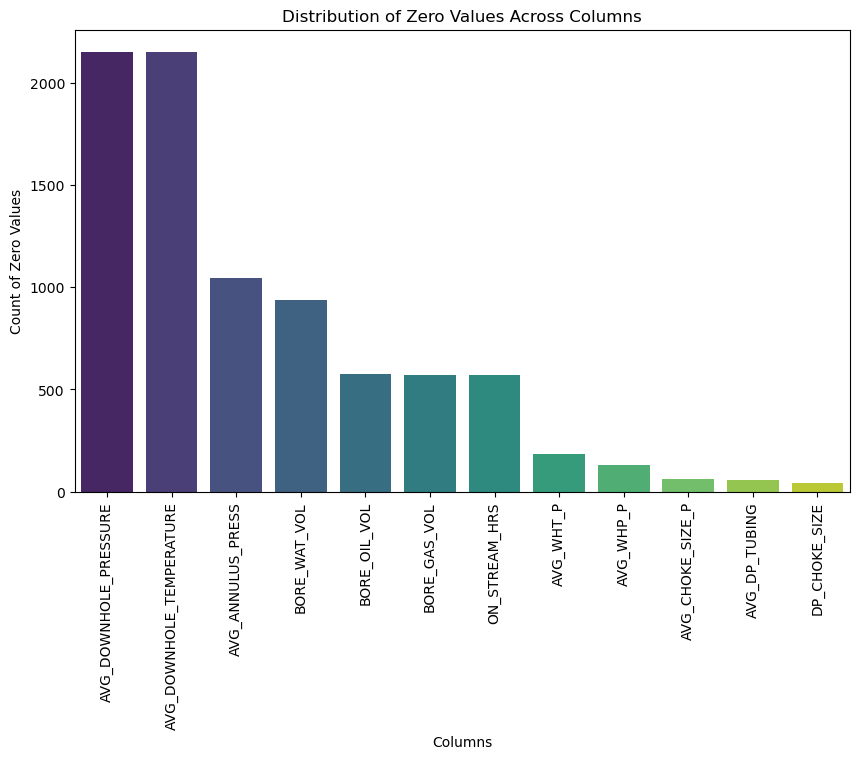

Date of Production             0
Wellbore name                  0
ON_STREAM_HRS                570
AVG_DOWNHOLE_PRESSURE       2152
AVG_DOWNHOLE_TEMPERATURE    2152
AVG_DP_TUBING                 56
AVG_ANNULUS_PRESS           1045
AVG_CHOKE_SIZE_P              60
AVG_WHP_P                    131
AVG_WHT_P                    183
DP_CHOKE_SIZE                 43
BORE_OIL_VOL                 576
BORE_GAS_VOL                 572
BORE_WAT_VOL                 937
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64


In [219]:
print("Checking for Zero Values in Dataset")

zero_counts = (production_data == 0).sum()

# Convert zero counts to DataFrame for easier plotting
zero_counts_df = zero_counts[zero_counts > 0].sort_values(ascending=False).to_frame(name='Zero Counts')

# Plotting zero counts as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts_df.index, y='Zero Counts', data=zero_counts_df,hue = zero_counts_df.index ,palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Zero Values Across Columns")
plt.xlabel("Columns")
plt.ylabel("Count of Zero Values")
plt.show()

print(zero_counts)

Checking No Zero Values in Dataset


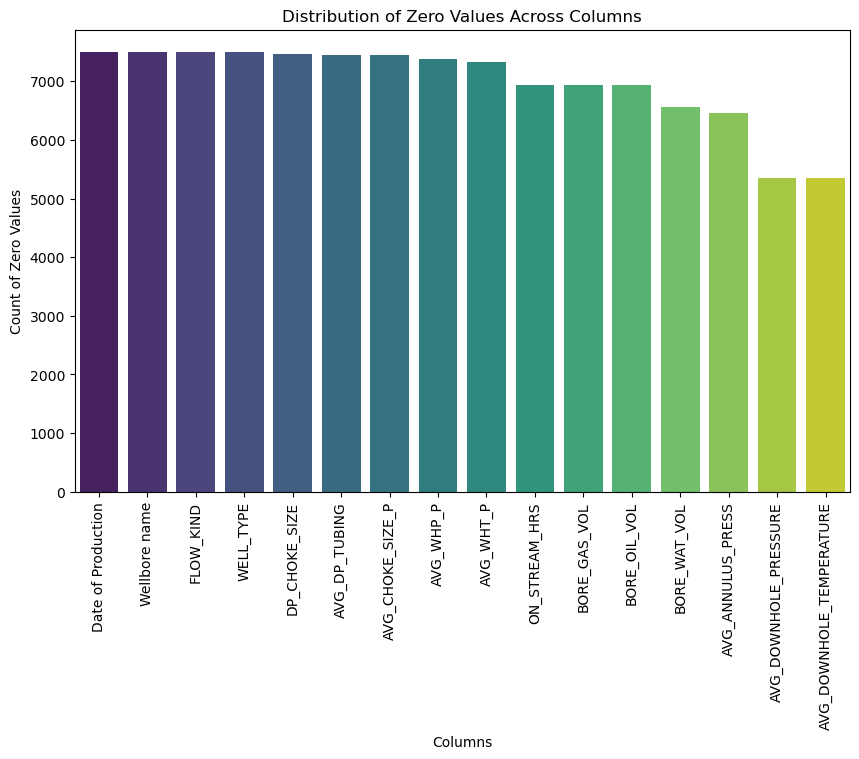

Date of Production          7504
Wellbore name               7504
ON_STREAM_HRS               6934
AVG_DOWNHOLE_PRESSURE       5352
AVG_DOWNHOLE_TEMPERATURE    5352
AVG_DP_TUBING               7448
AVG_ANNULUS_PRESS           6459
AVG_CHOKE_SIZE_P            7444
AVG_WHP_P                   7373
AVG_WHT_P                   7321
DP_CHOKE_SIZE               7461
BORE_OIL_VOL                6928
BORE_GAS_VOL                6932
BORE_WAT_VOL                6567
FLOW_KIND                   7504
WELL_TYPE                   7504
dtype: int64


In [217]:
print("Checking No Zero Values in Dataset")

zero_counts = (production_data != 0).sum()

# Convert zero counts to DataFrame for easier plotting
zero_counts_df = zero_counts[zero_counts > 0].sort_values(ascending=False).to_frame(name='Zero Counts')

# Plotting zero counts as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts_df.index, y='Zero Counts', data=zero_counts_df,hue = zero_counts_df.index ,palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Zero Values Across Columns")
plt.xlabel("Columns")
plt.ylabel("Count of Zero Values")
plt.show()

print(zero_counts)

##### Removing Rows with Zero Values in Key Columns
Theur data has some columns with rows containing zero values, which might not be useful for analysis. For instance:

- Columns like `ON_STREAM_HRS`, `AVG_DOWNHOLE_PRESSURE`, and `AVG_DOWNHOLE_TEMPERATURE` show rows with zeros, possibly because no data was recorded or the values weren’t applicable at the time.
- Similarly, columns such as `BORE_OIL_VOL` and `BORE_GAS_VOL` also have zeros, which likely don't reflect actual production numbers and might mislead our analysis.

To keep our data clean and focus on useful informIion, we’ll remove rows with zero values in these key columns. This will help us work with accurate, complete data and get better results from our analysis.


In [229]:
# List of key columns where I want to remove rows with zero values
columns_with_zeros = [
    'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
    'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
    'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'
]

# Removing rows with zero values in any of the specified columns
production_data_cleaned = production_data[(production_data[columns_with_zeros] != 0).all(axis=1)]

# Checking the new shape of the dataset
print("Data shape after removing rows with zeros:", production_data_cleaned.shape)


Data shape after removing rows with zeros: (3805, 16)


In [231]:
production_data_cleaned.sample(10)

Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
2648          23-Feb-10   15/9-F-12 H           23.5                259.597   
2799          27-Jul-10   15/9-F-12 H           24.0                282.784   
2082           2-Aug-08   15/9-F-12 H           24.0                267.471   
1382           8-Apr-15   15/9-F-11 H           24.0                220.018   
8556           1-Jul-15   15/9-F-15 D           24.0                201.891   
7470          15-Mar-15   15/9-F-14 H           24.0                265.066   
8537          12-Jun-15   15/9-F-15 D           24.0                200.067   
6710           1-Feb-13   15/9-F-14 H           24.0                241.871   
6990          18-Nov-13   15/9-F-14 H           24.0                249.769   
1193           1-Oct-14   15/9-F-11 H           24.0                219.699   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
2648                   107.330        199.993             23.808   
2799                   107.274        223.439             25.133   
2082                   106.068        176.968              9.567   
1382                   105.541        168.675             18.204   
8556                   106.201        170.878             12.376   
7470                    99.653        234.323             13.784   
8537                   106.272        169.171             13.313   
6710                   101.178        209.259             22.356   
6990                   100.210        217.531             20.871   
1193                   106.277        167.854             23.955   

      AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
2648          65.90551     59.603     84.925         26.729        3461.0   
2799          51.26580     59.345     89.283         26.396        1860.0   
2082          38.32368     90.503     72.348         60.195        3032.0   
1382          20.96206     51.343     74.778         22.042        1764.0   
8556           9.65481     31.013     26.751          2.403         113.0   
7470         100.00000     30.742     87.155          2.204         257.0   
8537          10.22691     30.895     31.064          2.267         123.0   
6710          89.36781     32.611     88.495          3.621         972.0   
6990         100.00000     32.238     88.042          2.780         701.0   
1193          12.02507     51.845     68.680         23.411        1129.0   

      BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND WELL_TYPE  
2648      496991.0        1593.0  production        OP  
2799      268868.0        3257.0  production        OP  
2082      445349.0           4.0  production        OP  
1382      255746.0         791.0  production        OP  
8556       16790.0          10.0  production        OP  
7470       37868.0        3486.0  production        OP  
8537       17909.0           9.0  production        OP  
6710      152750.0        3129.0  production        OP  
6990      104686.0        3522.0  production        OP  
1193      183325.0         331.0  production        OP

#### Convert data types to appropriate formats

In [243]:
production_data_cleaned.loc[:, 'Date of Production'] = pd.to_datetime(
    production_data_cleaned['Date of Production'], errors='coerce', format="%d-%b-%y"
)

production_data_cleaned.loc[:, 'Wellbore name'] = production_data_cleaned['Wellbore name'].astype('string')  # Ensure wellbore names are strings

# Converting numeric columns to floats
numeric_columns = [
    'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
    'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
    'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'
]
production_data_cleaned.loc[:, numeric_columns] = production_data_cleaned[numeric_columns].astype(float)

# Convert categorical columns to string
production_data_cleaned.loc[:, 'FLOW_KIND'] = production_data_cleaned['FLOW_KIND'].astype('string')
production_data_cleaned.loc[:, 'WELL_TYPE'] = production_data_cleaned['WELL_TYPE'].astype('string')

In [245]:
print(production_data_cleaned.dtypes)

Date of Production          datetime64[ns]
Wellbore name               string[python]
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
FLOW_KIND                   string[python]
WELL_TYPE                   string[python]
dtype: object


### Gas-Oil Ratio (GOR) Calculation

Calculating the Gas-Oil Ratio (GOR) using production data from various wells. The GOR is an important measure in the oil and gas industry, indicating how much gas is produced for every barrel of oil.

#### Data Used

The key data points for this calculation include:

- **Date of Production**: When the production took place.
- **Wellbore Name**: Identifier for the well.
- **BORE_OIL_VOL**: Volume of oil produced.
- **BORE_GAS_VOL**: Volume of gas produced.

#### GOR Calculation

I calculate the GOR by dividing the **volume of gas produced** by the **volume of oil produced**.

In [251]:
# Function to calculate GOR
def calculate_gor(row):
    if row['BORE_OIL_VOL'] > 0:  # Avoid division by zero
        return row['BORE_GAS_VOL'] / row['BORE_OIL_VOL']
    else:
        return None  # Handle division by zero case

# Working on a copy of the DataFrame
production_data_cleaned = production_data_cleaned.copy()

# Adding a new column for calculated GOR using .loc
production_data_cleaned.loc[:, 'Calculated_GOR'] = production_data_cleaned.apply(calculate_gor, axis=1)

In [253]:
# Display the updated DataFrame with the new GOR column
production_data_cleaned.sample(3)

Date of Production Wellbore name  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
8496         2015-05-02   15/9-F-15 D           24.0                200.034   
6724         2013-02-15   15/9-F-14 H           24.0                242.325   
8918         2016-06-27   15/9-F-15 D           24.0                199.741   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
8496                   106.450        167.542             15.244   
6724                   101.098        210.127             21.927   
8918                   106.473        182.404             19.984   

      AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
8496          10.06853     32.491     30.808          3.863         148.0   
6724          96.96410     32.197     86.615          3.237         959.0   
8918          27.93148     17.337     46.698          2.291         144.0   

      BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND WELL_TYPE  Calculated_GOR  
8496       21044.0          10.0  production        OP      142.189189  
6724      154866.0        3383.0  production        OP      161.486966  
8918       23047.0         203.0  production        OP      160.048611

#### Checking for duplicates in the DataFrame

In [266]:
duplicates = production_data_cleaned[production_data_cleaned.duplicated()]

# Display the number of duplicate rows
num_duplicates = duplicates.shape[0]
print(f'Number of duplicate rows: {num_duplicates}')

# Display the duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


### Saving cleaned dataset

In [258]:
# Assuming your cleaned DataFrame is named production_data_cleaned
production_data_cleaned.to_csv('../pvt_Data/cleaned_production_data.csv', index=False)